In [1]:
#make one gap with 10^6 halo
import astropy.units as u
import numpy as np
import gala.potential as gp
import gala.dynamics as gd
from gala.dynamics import mockstream as ms
from gala.units import galactic
from astropy.coordinates import SkyCoord, Distance

import matplotlib.pyplot as plt

from tqdm import tqdm
from astropy.constants import G
from gala.units import galactic
import gala.coordinates as gc
import  h5py
import imageio
import seaborn as sns
import matplotlib as mpl
import matplotlib.animation as animation
import astropy.coordinates as astro_coord
import glob
import pandas as pd
sns.set_style("dark")
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
font = {'axes.titlesize'      : 'large',   # fontsize of the axes title
        'axes.labelsize'      : 'large', # fontsize of the x any y labels
        'size'   : 20}
import astropy.units as u
from astropy.io import ascii
import itertools
from scipy import stats
#paths

#paths
path_plot = '/users/caganze/research/stellarstreams/figures/paper/'
path_data = '/users/caganze/research/stellarstreams/data/rotating/'
isochrone_path='/users/caganze/research/stellarstreams/data/isochrones/'


from matplotlib.gridspec import GridSpec
%matplotlib inline
#%matplotlib notebook

In [2]:
def read_stream_file(filename):
    """
    reads in a saved stream run 
    returns the subhalo, progenitor and stream
    """
    f = h5py.File(path_data+'/'+filename, mode='r')
    
    body=f['nbody']
    stream_cont=f['stream']
    
    #f.close()
    return body, stream_cont

def read_orbit_file(filename):
    return np.load(path_data+'/{}'.format(filename), allow_pickle=True)

In [85]:
masses= [10**5, 5*10**5,  10**6]

In [ ]:
#make the progenitor sit at (0, 0)


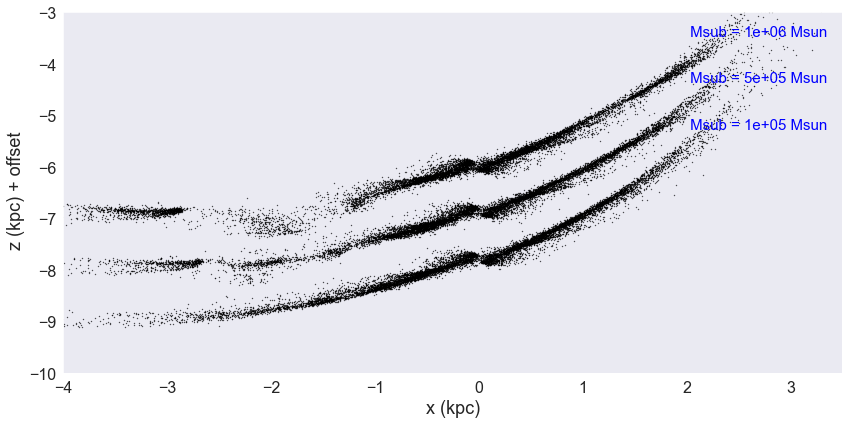

In [110]:
fig, ax=plt.subplots(figsize=(12, 6))

for idx in range(len(masses)):
    
    mhalo=masses[idx]
    filename='rot_mocstream{:.2e}'.format(mhalo)+'.npy'
    st=read_orbit_file(filename).flatten()[0]
    
    xoff= np.nanmedian(st['stream'].x.value)
    #print (xoff)
    mask= np.logical_and( st['stream'].z.value>0, st['stream'].z.value<10)

    #ax.scatter(st['stream'].z.value[mask]-xoff, st['stream'].y.value[mask]+idx, s=1, c='k')
    #ax.scatter(st['prog'].z.value-xoff, st['prog'].y.value+idx, s=100, c='b')
    ax.scatter(st['stream'].x.value-xoff,  st['stream'].z.value+idx, s=.1, c='k')
    
    ax.text(2, np.nanmedian(st['stream'].z.value+idx)+2.5 , \
            " Msub = {:.0e} Msun".format(mhalo) ,c='b', fontsize=15)

    
    
ax.set(xlim=[-4, 3.5], ylim=[ -10, -3])
ax.set_xlabel(' x (kpc) ', fontsize=18)
ax.set_ylabel(' z (kpc) + offset', fontsize=18)
plt.tight_layout()
plt.minorticks_on()
